This is a template (in developement) for an unified analysis on the multi-v test results

In [1]:
import analysis_tools as atool
from matplotlib import pyplot as plt
import numpy as np
import os

Read and initialize the test result as a "TestResults" object

In [2]:
#figDir = "figures"
#if not os.path.exists(figDir):
#    os.makedirs(figDir)

tname = "example_result.txt"
tr = atool.TestResults(tname)

analysis_tools.py:201: RuntimeWarning: invalid value encountered in greater
  swapmask = diffVLSR1 > diffVLSR2


Plot the confusion matrix for the test results, for all pixels

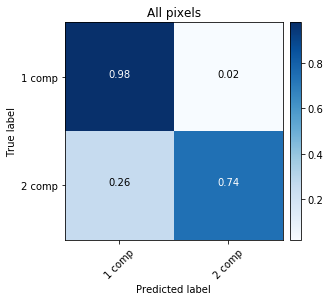

In [3]:
tr.plot_cmatrix()

Now plot the confusion matrices binned by SNR values

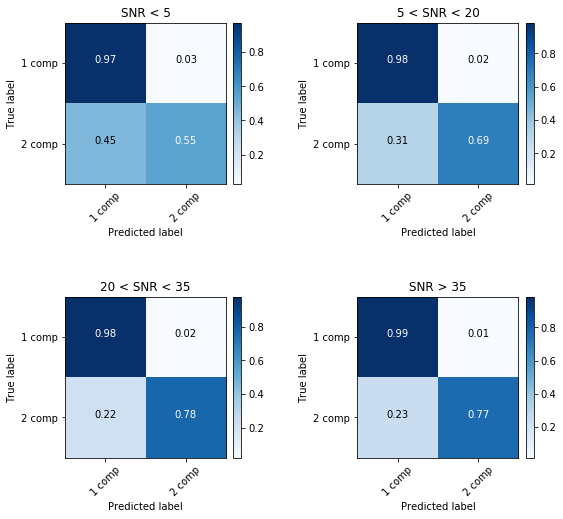

In [4]:
tr.plot_cmatrix_wZBins(Z_Key='snr', bin_edges=(5,20,35), qname="SNR", ncols=2, figsize=(10, 8))

Plot the success rate of the true positive identification of two components as a function of true velocity seperation of the two components, binned by various values

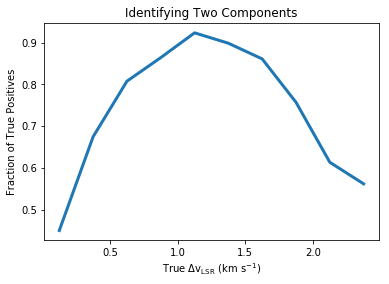

In [5]:
figsize=(6,4)
fig, ax = plt.subplots(1, 1, figsize=figsize)
ax.set_title('Identifying Two Components')
ax.set_ylabel('Fraction of True Positives')
ax.set_xlabel('True $\Delta \mathrm{v}_\mathrm{LSR}$ (km s$^{-1}$)')
tr.plot_success_rate('true_vsep', ax=ax)

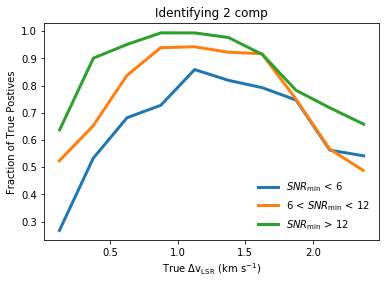

In [6]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
bin_edges = [6,12]
qname = "$SNR_{\mathrm{min}}$"
ax.set_title('Identifying 2 comp')
ax.set_xlabel('True $\Delta \mathrm{v}_\mathrm{LSR}$ (km s$^{-1}$)')
tr.plot_success_rate_wZBins('true_vsep', 'snr_min', bin_edges, bins=10, qname=qname, ax=ax)

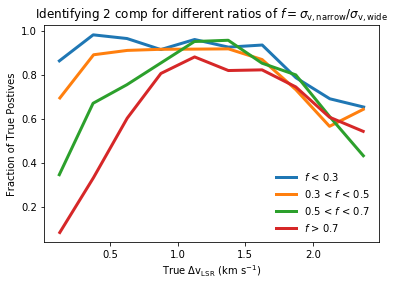

In [7]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
bin_edges = [0.3, 0.5, 0.7]
qname = "$f$"
ax.set_title('Identifying 2 comp for different ratios of $f=\sigma_{\mathrm{v,narrow}}/\sigma_{\mathrm{v,wide}}$')
ax.set_xlabel('True $\Delta \mathrm{v}_\mathrm{LSR}$ (km s$^{-1}$)')
tr.plot_success_rate_wZBins('true_vsep', 'sig_ratio', bin_edges, bins=10, qname=qname, ax=ax)

Plot the true error of the fitted vlsr for true postive (i.e., good) one component fits

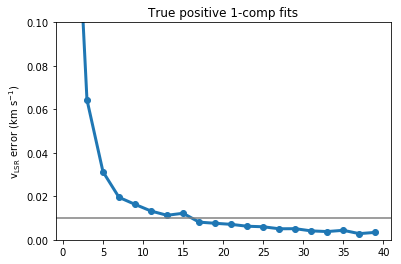

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.set_ylim((0,0.1))
ax.set_title('True positive 1-comp fits')
tr.plot_error('snr', 'true_vErr1', bins=20, range=(0,40), ax=ax, mask = tr.mask_1v_truepos)
ax.set_ylabel('v$_{\mathrm{LSR}}$ error (km s$^{-1}$)')
ax.axhline(0.01, c="0.5")

Plot the true error of the fitted vlsr for true postive two component fits

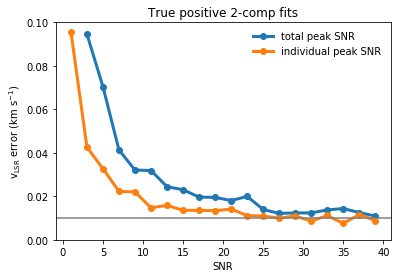

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.set_ylim((0,0.1))
tr.plot_error(['snr','snr'], ['true_vErr1','true_vErr2'], bins=20, range=(0,40), mask = tr.mask_2v_truepos, ax=ax)
tr.plot_error(['snr-1','snr-2'], ['true_vErr1','true_vErr2'], bins=20, range=(0,40), mask = tr.mask_2v_truepos, ax=ax)
legend = ["total peak SNR", "individual peak SNR"]
ax.legend(legend, frameon=False)
ax.set_title('True positive 2-comp fits')
ax.set_ylabel('v$_{\mathrm{LSR}}$ error (km s$^{-1}$)')
ax.set_xlabel('SNR')
ax.axhline(0.01, c="0.5")

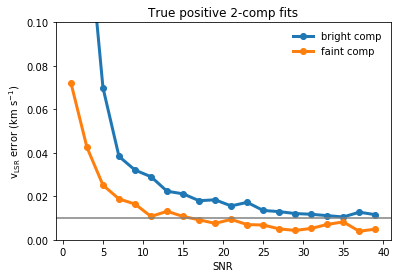

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.set_ylim((0,0.1))
tr.plot_error(['snr_max','snr_max'], ['true_vErr1','true_vErr2'], bins=20, range=(0,40),
              mask = tr.mask_2v_truepos, ax=ax)
tr.plot_error(['snr_min','snr_min'], ['true_vErr1','true_vErr2'], bins=20, range=(0,40), 
              mask = tr.mask_2v_truepos, ax=ax)
legend = ["bright comp", "faint comp"]
ax.legend(legend, frameon=False)
ax.set_title('True positive 2-comp fits')
ax.set_ylabel('v$_{\mathrm{LSR}}$ error (km s$^{-1}$)')
ax.set_xlabel('SNR')
ax.axhline(0.01, c="0.5")

Text(0.5,0,'SNR ratio (i.e., SNR$_{\\mathrm{min}}$/SNR$_{\\mathrm{max}}$)')

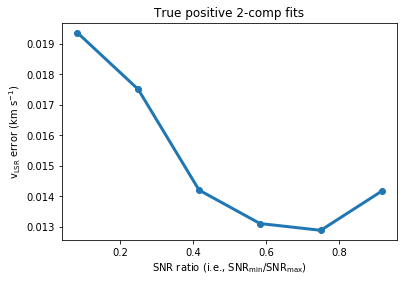

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
tr.plot_error(['snr_ratio','snr_ratio'], ['true_vErr1','true_vErr2'], bins=6, range=(0,1),
              mask = tr.mask_2v_truepos, ax=ax)
ax.set_title('True positive 2-comp fits')
ax.set_ylabel('v$_{\mathrm{LSR}}$ error (km s$^{-1}$)')
ax.set_xlabel('SNR ratio (i.e., SNR$_{\mathrm{min}}$/SNR$_{\mathrm{max}}$)')